In [36]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-87.82465266943964 -122.57559991725657
42.009458120698895 121.38413202514033
-4.991400634160755 60.71963133642652
-41.82090616827575 143.54345233778434
52.5150128140223 -108.82964669315575
66.20356731942394 48.776996006008574
-88.63409688220533 83.21799680496468
-38.74060607096011 174.60706885989794
-49.076381529467625 -63.81016719868167
40.77982149163776 20.404416160040086
28.55044743193271 -19.352042585056807
5.051233432159876 -87.43443575150633
-72.75355622770915 -123.9224570871564
-25.6640532143671 -143.55869767586648
-49.49357957751352 -110.07890549758736
-38.874472793943994 -17.165000259970014
-84.58169885825558 -125.28688513648446
14.951764159121069 39.02926571820322
-73.2327111347011 76.58958319962619
24.519762342365212 -16.382691401564614
56.91747960001857 -68.38734428477491
14.020966753031843 25.499262547473023
-38.79631682802266 -57.31553982405376
-59.36639096373999 108.1032798250493
-69.99166969859623 162.44884886845523
-26.758770917006473 -14.004894405612703
43.87450318676

In [11]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4dff440b07db3eb165baed62bc40d77d


In [26]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [38]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
        
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | fuxin
Processing Record 3 of Set 1 | victoria
Processing Record 4 of Set 1 | burnie
Processing Record 5 of Set 1 | wilkie
Processing Record 6 of Set 1 | koslan
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | waitara
Processing Record 9 of Set 1 | comodoro rivadavia
Processing Record 10 of Set 1 | gramsh
Processing Record 11 of Set 1 | los llanos de aridane
Processing Record 12 of Set 1 | parrita
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | addi ugri
City not found. Skipping...
Processing Record 17 of Set 1 | santa lucia
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | kutum
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | bluff
Proce

Processing Record 39 of Set 4 | melipilla
Processing Record 40 of Set 4 | saint-leu
Processing Record 41 of Set 4 | cidreira
Processing Record 42 of Set 4 | port lincoln
Processing Record 43 of Set 4 | huatulco
Processing Record 44 of Set 4 | otuzco
Processing Record 45 of Set 4 | celestun
Processing Record 46 of Set 4 | scarborough
Processing Record 47 of Set 4 | kuytun
Processing Record 48 of Set 4 | lolua
City not found. Skipping...
Processing Record 49 of Set 4 | sakakah
Processing Record 50 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 1 of Set 5 | caucaia
Processing Record 2 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 5 | haines junction
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | chany
Processing Record 6 of Set 5 | yanan
City not found. Skipping...
Processing Record 7 of Set 5 | vostok
Processing Record 8 of Set 5 | constitucion
Processing Record 9 of Set 5 | mackay
Processing Record 10 of

Processing Record 27 of Set 8 | la palma
Processing Record 28 of Set 8 | abbeville
Processing Record 29 of Set 8 | arona
Processing Record 30 of Set 8 | elizabeth city
Processing Record 31 of Set 8 | el jicaro
Processing Record 32 of Set 8 | tucurui
Processing Record 33 of Set 8 | asfi
Processing Record 34 of Set 8 | harlow
Processing Record 35 of Set 8 | suluq
Processing Record 36 of Set 8 | missoula
Processing Record 37 of Set 8 | kahului
Processing Record 38 of Set 8 | saldanha
Processing Record 39 of Set 8 | korla
Processing Record 40 of Set 8 | yenangyaung
Processing Record 41 of Set 8 | barra do garcas
Processing Record 42 of Set 8 | narsaq
Processing Record 43 of Set 8 | sept-iles
Processing Record 44 of Set 8 | katy
Processing Record 45 of Set 8 | la romana
Processing Record 46 of Set 8 | kampot
Processing Record 47 of Set 8 | klaksvik
Processing Record 48 of Set 8 | katangli
Processing Record 49 of Set 8 | qabis
City not found. Skipping...
Processing Record 50 of Set 8 | kavar

Processing Record 13 of Set 12 | chitrakonda
Processing Record 14 of Set 12 | estevan
Processing Record 15 of Set 12 | karlovac
Processing Record 16 of Set 12 | xiongzhou
Processing Record 17 of Set 12 | russell
Processing Record 18 of Set 12 | bijar
Processing Record 19 of Set 12 | saint-michel-des-saints
Processing Record 20 of Set 12 | kaeo
Processing Record 21 of Set 12 | kurilsk
Processing Record 22 of Set 12 | sistranda
Processing Record 23 of Set 12 | gimli
Processing Record 24 of Set 12 | lincolnton
Processing Record 25 of Set 12 | salinopolis
Processing Record 26 of Set 12 | padang
Processing Record 27 of Set 12 | shar
Processing Record 28 of Set 12 | hasaki
Processing Record 29 of Set 12 | dodge city
Processing Record 30 of Set 12 | belmopan
Processing Record 31 of Set 12 | yinchuan
Processing Record 32 of Set 12 | leh
Processing Record 33 of Set 12 | dzaoudzi
Processing Record 34 of Set 12 | manggar
Processing Record 35 of Set 12 | slave lake
Processing Record 36 of Set 12 |

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,48.31,81,75,5.75,CL,2022-06-12 22:51:33
1,Fuxin,42.0156,121.6589,63.73,85,96,7.92,CN,2022-06-12 22:51:34
2,Victoria,22.2855,114.1577,83.97,86,100,11.99,HK,2022-06-12 22:49:32
3,Burnie,-41.0667,145.9167,45.37,74,4,6.31,AU,2022-06-12 22:51:34
4,Wilkie,52.4168,-108.7014,66.58,64,76,15.50,CA,2022-06-12 22:51:35


In [41]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-06-12 22:51:33,-53.1500,-70.9167,48.31,81,75,5.75
1,Fuxin,CN,2022-06-12 22:51:34,42.0156,121.6589,63.73,85,96,7.92
2,Victoria,HK,2022-06-12 22:49:32,22.2855,114.1577,83.97,86,100,11.99
3,Burnie,AU,2022-06-12 22:51:34,-41.0667,145.9167,45.37,74,4,6.31
4,Wilkie,CA,2022-06-12 22:51:35,52.4168,-108.7014,66.58,64,76,15.50


In [43]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

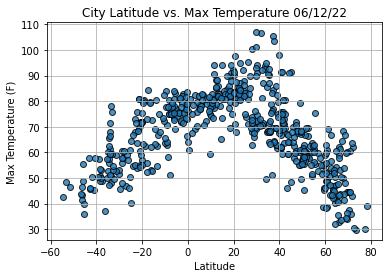

In [45]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

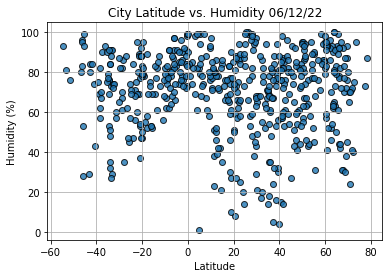

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

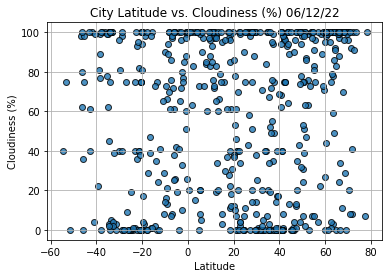

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()
